# Logistic Regression - Bank 

In [1]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#inline visualization
%matplotlib inline

In [2]:
#load data and use delimiter for data extraction
df = pd.read_csv('bank-full1.csv',delimiter=';')

#display data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


C:\Users\Punith Gowda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

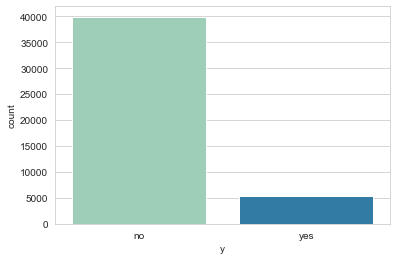

In [3]:
sns.set_style('whitegrid')
sns.countplot(df.y, palette='YlGnBu')

In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

C:\Users\Punith Gowda\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

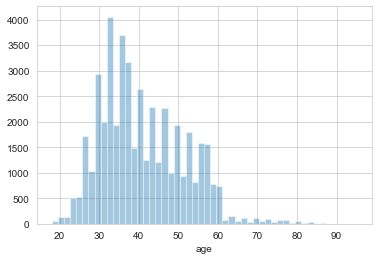

In [5]:
sns.distplot(df.age, kde=False)

C:\Users\Punith Gowda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


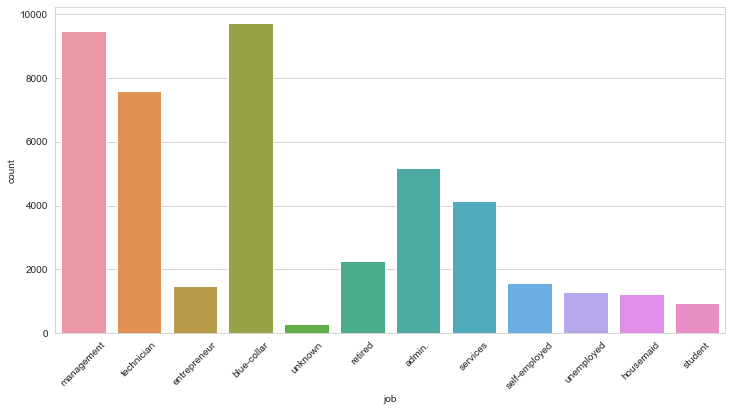

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(df.job)
plt.xticks(rotation=45)
plt.show()

C:\Users\Punith Gowda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

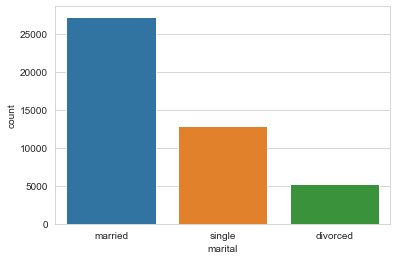

In [7]:
sns.countplot(df.marital)

C:\Users\Punith Gowda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default', ylabel='count'>

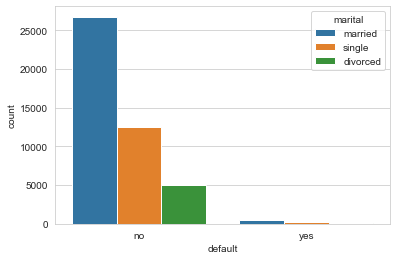

In [8]:
sns.countplot(df.default, hue=df.marital)

In [9]:
df = df.drop(['contact', 'day', 'month', 'duration', 'pdays', 'previous', 'poutcome'], axis=1)

In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,1,no
1,44,technician,single,secondary,no,29,yes,no,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,1,no
4,33,unknown,single,unknown,no,1,no,no,1,no


In [11]:
#import sklearn preprocessing LabelEncoder to fit the data
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()

In [12]:
#fit_transform data individually
#job
df['job']=lab.fit_transform(df['job'])
#maritial
df['marital']=lab.fit_transform(df['marital'])
#education
df['education']=lab.fit_transform(df['education'])
#default
df['default']=lab.fit_transform(df['default'])
#housing
df['housing']=lab.fit_transform(df['housing'])
#loan
df['loan']=lab.fit_transform(df['loan'])
#y
df['y']=lab.fit_transform(df['y'])

In [13]:
#call data 
df.head()

,age,job,marital,education,default,balance,housing,loan,campaign,y
0,58,4,1,2,0,2143,1,0,1,0
1,44,9,2,1,0,29,1,0,1,0
2,33,2,1,1,0,2,1,1,1,0
3,47,1,1,3,0,1506,1,0,1,0
4,33,11,2,3,0,1,0,0,1,0


In [14]:
#define X and Y to train test split
X = df.drop('y', axis=1)
y = df['y']

In [15]:
#import sklearn train test split
from sklearn.model_selection import train_test_split

In [16]:
#train test split for 20% data and random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
#import module logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression

In [18]:
#call logistic regression
log = LogisticRegression()

In [19]:
#fit Train values of X and y
log.fit(X_train,y_train)

C:\Users\Punith Gowda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
#predict
pred = log.predict(X_test)


In [21]:
#sccore
log.score(X_test,y_test)

0.8790224483025545

In [22]:
#import confusion matrix, accuracy score and classification report from sklearn metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [23]:
#confusion matrix
confusion_matrix(y_test,pred)

array([[7949,    3],
       [1091,    0]], dtype=int64)

In [24]:
#accuracy_score
accuracy_score(y_test,pred)

0.8790224483025545

In [25]:
#classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7952
           1       0.00      0.00      0.00      1091

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.77      0.88      0.82      9043



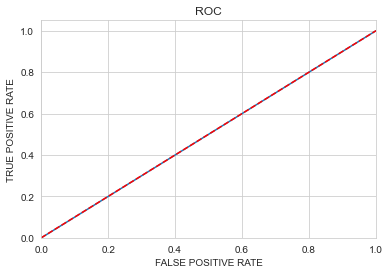

In [31]:
#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = roc_auc_score(y_test, pred)
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression Sensitivity = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('ROC')
plt.show()